# LEGO Data Classification

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from matplotlib import pyplot as plt


base_dir = "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new__"
train_dir = os.path.join(base_dir, "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new__/_train")
test_dir = os.path.join(base_dir, "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new__/_test")
validation_dir = os.path.join(base_dir, "A:/Escuela/Octavos_Semestre/M2_IA/Act_2.1/new__/_validation")

In [ ]:
def add_background(image):
    # Convert the image to an array
    image_array = np.array(image)

    # Check if the image has an alpha channel
    if image_array.shape[2] == 4:
        # Split the image into RGB and alpha channels
        rgb = image_array[:, :, :3]
        alpha = image_array[:, :, 3]

        # Create a new image with the background color and the same size as the original image
        background = np.full_like(rgb, [255, 255, 255])

        # Blend the original image with the background
        blended = (1 - alpha / 255) * background + (alpha / 255) * rgb

        return blended.astype(np.uint8)
    else:
        return image_array

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=100,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    preprocessing_function=add_background
)

Found 4465 images belonging to 16 classes.
(64, 150, 150, 3)
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<Figure size 640x480 with 0 Axes>

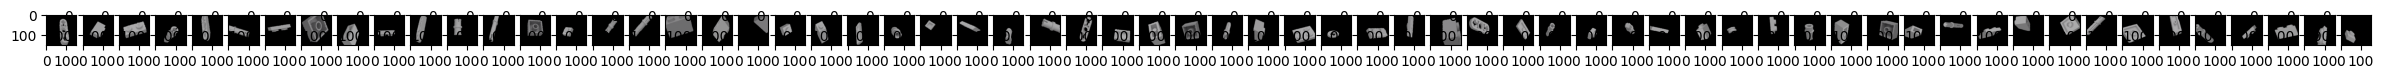

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode="categorical",
    # save_to_dir=base_dir+'/_augmented/',
    save_prefix='aug',
    save_format='png'
)

# images , labels = train_generator[0]
images, labels = next(train_generator)


print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]) :
  axarr[i].imshow(images[i])

In [ ]:
test_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    # rotation_range=100,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.3,
    # zoom_range=0.3,
    # horizontal_flip=True,
    preprocessing_function=add_background
    
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode="categorical",
    # save_to_dir=base_dir+'/_augmented/',
    save_prefix='aug',
    save_format='png'
)

Found 957 images belonging to 16 classes.


In [ ]:
validation_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    # rotation_range=100,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.3,
    # zoom_range=0.3,
    # horizontal_flip=True,
    preprocessing_function=add_background
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode="categorical",
    # save_to_dir=base_dir+'/_augmented/',
    save_prefix='aug',
    save_format='png'
)

Found 957 images belonging to 16 classes.


## Creación del Modelo

Epoch 1/10


C:\Users\alex_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3115 - loss: 5.7725
Epoch 1: saving model to __saved-model-01-stage1.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - accuracy: 0.3132 - loss: 5.7352 - val_accuracy: 0.5956 - val_loss: 1.2124
Epoch 2/10


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to __saved-model-02-stage1.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5818 - loss: 1.3056
Epoch 3: saving model to __saved-model-03-stage1.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.5820 - loss: 1.3041 - val_accuracy: 0.7032 - val_loss: 0.7742
Epoch 4/10

Epoch 4: saving model to __saved-model-04-stage1.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6716 - loss: 0.9212
Epoch 5: saving model to __saved-model-05-stage1.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.6715 - loss: 0.9212 - val_accuracy: 0.7388 - val_loss: 0.7327
Epoch 6/10

Epoch 6: saving model to __saved-model-06-stage1.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step

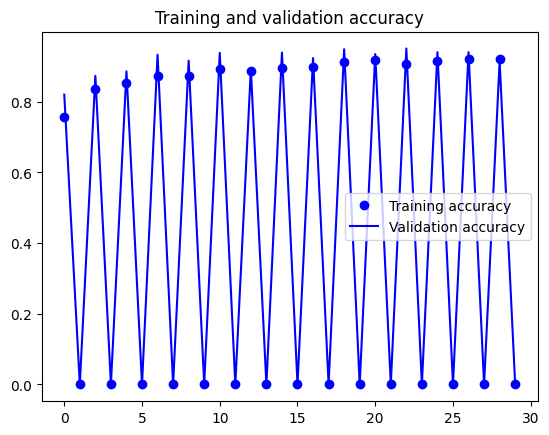

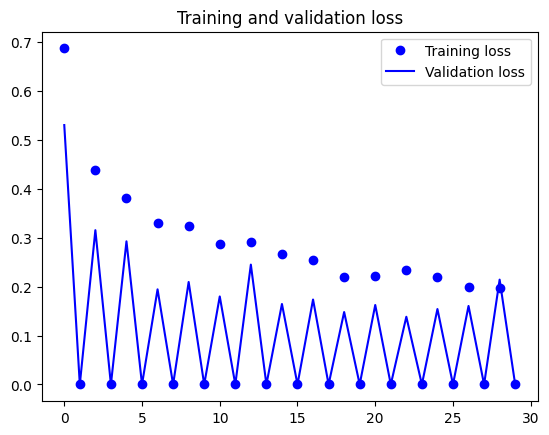

In [ ]:
# Cargar el modelo base InceptionV3 pre-entrenado en ImageNet
base_model = InceptionV3(weights="imagenet", include_top=False)

# Añadir capas personalizadas para la clasificación de LEGO
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# Definir el modelo
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar todas las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Callbacks para TensorBoard y ModelCheckpoint
tensorboard_callback = TensorBoard(log_dir="./logs_new/stage1")
checkpoint_callback = ModelCheckpoint(
    "__saved-model-{epoch:02d}-stage1.keras",
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    mode="max",
)

# Entrenar el modelo (Etapa 1)
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[tensorboard_callback, checkpoint_callback],
)

# Descongelar las últimas capas del modelo base
for layer in model.layers[:249]:
    layer.trainable = False
for layer in model.layers[249:]:
    layer.trainable = True

# Compilar el modelo nuevamente con un optimizador SGD
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

# Callbacks para TensorBoard y ModelCheckpoint
tensorboard_callback2 = TensorBoard(log_dir="./logs_new/stage2")
checkpoint_callback2 = ModelCheckpoint(
    "__saved-model-{epoch:02d}-stage2.keras",
    
    monitor="val_accuracy",
    verbose=1,
    save_best_only=False,
    mode="max",
)

# Entrenar el modelo nuevamente (Etapa 2)
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    callbacks=[tensorboard_callback2, checkpoint_callback2],
)

# Evaluar el modelo en datos de prueba
evaluation = model.evaluate(test_generator, steps=len(test_generator))
print("Test Accuracy:", evaluation[1])

# Guardar el modelo entrenado
model.save("__model_best_new_2.keras")

# Visualizar el proceso de entrenamiento
acc = history.history['accuracy']  
val_acc = history.history['val_accuracy']  
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')  
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')  
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()